# Scalable Data Processing with Dask

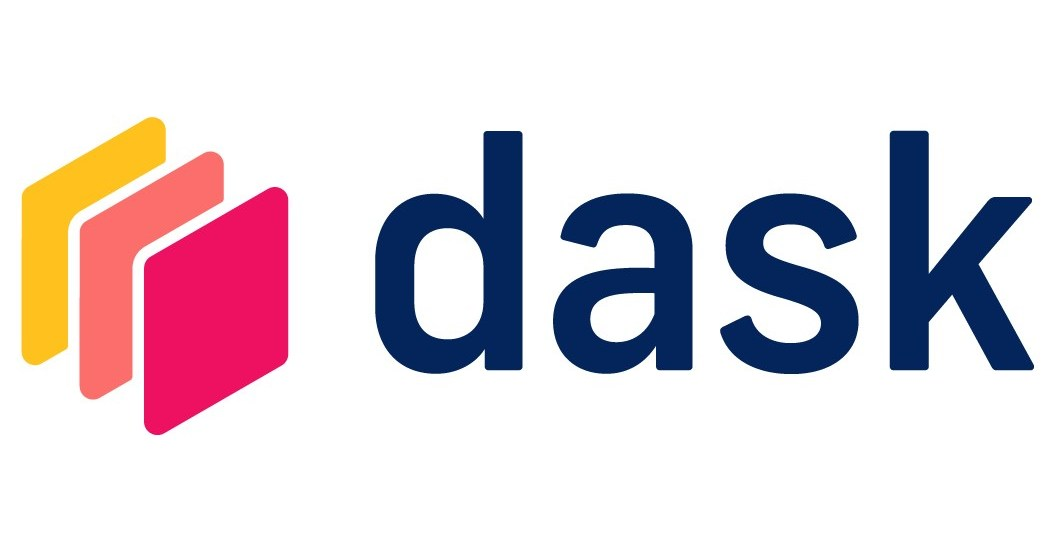

In [ ]:
import dask
import dask.dataframe as dd

## 1. Yellow Taxis Trip Records NYC

We will load 12 parquet files (at once) of monthly yellow taxi trip records in NYC from **2022**. The data is available on your lab machine in K019 in 

        /var/ki_data/tgki/yellow_trips_2022

Alternatively, you can download the data to your local machine from [the NYC Taxi & Limousine Commission](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). You should read the [data dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) to better understand the data. Put all 12 parquet files into the same folder: 

        yellow_tripdata_2022-01.parquet
        yellow_tripdata_2022-02.parquet
        yellow_tripdata_2022-03.parquet
        yellow_tripdata_2022-04.parquet
        yellow_tripdata_2022-05.parquet
        yellow_tripdata_2022-06.parquet
        yellow_tripdata_2022-07.parquet
        yellow_tripdata_2022-08.parquet
        yellow_tripdata_2022-09.parquet
        yellow_tripdata_2022-10.parquet
        yellow_tripdata_2022-11.parquet
        yellow_tripdata_2022-12.parquet




In [ ]:
# YELLOW_TRIPS_PATH = '/var/ki_data/tgki/yellow_trips_2022/yellow_tripdata_2022-*.parquet'
YELLOW_TRIPS_PATH = './data/yellow_tripdata_2022-*.parquet'

In [ ]:
df = dd.read_parquet(YELLOW_TRIPS_PATH)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.dtypes

### Answer the following questions and solve the corresponding tasks

1. How many taxi trip records are in the dataset?
2. How many non-valid passenger counts are in the dataset? Remove the corresponding rows from the dataframe.
3. Find out the average trip distance based on the number of passengers in the cab.
4. Find out how well New Yorkers tip based on the number of passengers in the cab. 
5. Are there any trips in the dataset that did not cost anything (look at `fare_amount`)? Remove the corresponding rows from the dataframe. Consider only trips with a positive `tip_amount` and repeat the calculation from 4.
6. Add an additional column to the dataframe that represents the share of the tip in the fare amount. Call it `tip_fraction`.
7. What is the tip behaviour based on the day of the week? Use tip_fraction for your analysis.
8. What is the tip behaviour based on the hour of day? Use tip_fraction for your analysis.
9. Plot the results from 8. and 9.

In [ ]:
# How many taxi trip records are in the dataset?


In [ ]:
# How many non-valid passenger counts are in the dataset? 


In [ ]:
# Remove the corresponding rows (non-valid passenger counts) from the dataframe.


In [ ]:
# Find out the average trip distance based on the number of passengers in the cab.


In [ ]:
# Find out how well New Yorkers tip based on the number of passengers in the cab.


In [ ]:
# Are there any trips in the dataset that did not cost anything (look at fare_amount)? 


In [ ]:
# Remove the corresponding rows (trips in the dataset that did not cost anything) from the dataframe. 


In [ ]:
# Consider only trips with a positive tip_amount and repeat the calculation from 4.


In [ ]:
# Add an additional column to the dataframe that represents the share of the tip in the fare amount. Call it tip_fraction.


In [ ]:
# What is the tip behaviour based on the day of the week?


In [ ]:
# What is the tip behaviour based on the hour of day?


In [ ]:
# Plot the results from the previous two calculations

## 2. Dask Delayed 

Watch 

In [ ]:
from IPython.display import YouTubeVideo
id='SHqFmynRxVU'
YouTubeVideo(id=id,width=600,height=300)

and read about [Dask Delayed best practices](https://docs.dask.org/en/latest/delayed-best-practices.html).

Find computations in previous exercises of this course that can be parallelized using Dask. Use Dask to parallelize those computations and `%time` the execution. Can you achieve a speedup using Dask only on one (your local) machine?

## 3. NYC Open Data with Dask 

[NYC Open Data](https://opendata.cityofnewyork.us/) publishes many interesting datasets you can explore. For example, you can export the data for [311 service requests](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) to the city of NY to a `csv`. NYC311 can accept service requests for a wide range of issues, including over 500 complaint types. Service Requests can help you get a pothole fixed in your neighborhood, the heat turned on in your apartment, or a refund for an overpaid parking ticket.

This dataset is available as `nyc311.csv` in the data folder on your lab machine (or you export the dataset from [311 service requests](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) to your local machine).

 - Explore the data with Dask using the DataFrame API
 - How many different complaint types are in the dataset?

In [ ]:
NYC_DATA = "./nyc_311/rows.csv" # change path if necessary 

In [ ]:
import dask.dataframe as dd

In [ ]:
df = dd.read_csv(NYC_DATA, dtype={'BBL': 'float64',
       'Bridge Highway Direction': 'object',
       'Bridge Highway Name': 'object',
       'Bridge Highway Segment': 'object',
       'Incident Zip': 'object',
       'Intersection Street 1': 'object',
       'Intersection Street 2': 'object',
       'Landmark': 'object',
       'Road Ramp': 'object',
       'Taxi Company Borough': 'object',
       'Taxi Pick Up Location': 'object',
       'Vehicle Type': 'object',
       'X Coordinate (State Plane)': 'float64',
       'Y Coordinate (State Plane)': 'float64'})

In [ ]:
df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Unique Key</th>
      <th>Created Date</th>
      <th>Closed Date</th>
      <th>Agency</th>
      <th>Agency Name</th>
      <th>Complaint Type</th>
      <th>Descriptor</th>
      <th>Location Type</th>
      <th>Incident Zip</th>
      <th>Incident Address</th>
      <th>...</th>
      <th>Vehicle Type</th>
      <th>Taxi Company Borough</th>
      <th>Taxi Pick Up Location</th>
      <th>Bridge Highway Name</th>
      <th>Bridge Highway Direction</th>
      <th>Road Ramp</th>
      <th>Bridge Highway Segment</th>
      <th>Latitude</th>
      <th>Longitude</th>
      <th>Location</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>39782953</td>
      <td>07/19/2018 03:22:59 AM</td>
      <td>07/19/2018 03:56:13 AM</td>
      <td>NYPD</td>
      <td>New York City Police Department</td>
      <td>Noise - Residential</td>
      <td>Loud Music/Party</td>
      <td>Residential Building/House</td>
      <td>10010</td>
      <td>145 EAST 23 STREET</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>40.739341</td>
      <td>-73.984324</td>
      <td>(40.739341420550296, -73.98432432194892)</td>
    </tr>
    <tr>
      <th>1</th>
      <td>39782954</td>
      <td>07/19/2018 10:56:45 PM</td>
      <td>07/19/2018 11:21:08 PM</td>
      <td>NYPD</td>
      <td>New York City Police Department</td>
      <td>Noise - Street/Sidewalk</td>
      <td>Loud Music/Party</td>
      <td>Street/Sidewalk</td>
      <td>10467</td>
      <td>375 EAST MOSHOLU PARKWAY NORTH</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>40.870662</td>
      <td>-73.880049</td>
      <td>(40.870661854738415, -73.8800488518787)</td>
    </tr>
    <tr>
      <th>2</th>
      <td>39782955</td>
      <td>07/19/2018 09:19:08 PM</td>
      <td>07/19/2018 09:53:17 PM</td>
      <td>NYPD</td>
      <td>New York City Police Department</td>
      <td>Noise - Street/Sidewalk</td>
      <td>Loud Music/Party</td>
      <td>Street/Sidewalk</td>
      <td>10027</td>
      <td>157 WEST 123 STREET</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>40.807131</td>
      <td>-73.947976</td>
      <td>(40.80713127072381, -73.94797627525777)</td>
    </tr>
    <tr>
      <th>3</th>
      <td>39782956</td>
      <td>07/19/2018 10:24:45 PM</td>
      <td>07/19/2018 11:20:06 PM</td>
      <td>NYPD</td>
      <td>New York City Police Department</td>
      <td>Noise - Street/Sidewalk</td>
      <td>Loud Music/Party</td>
      <td>Street/Sidewalk</td>
      <td>10467</td>
      <td>15 WEST MOSHOLU PARKWAY NORTH</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>40.881019</td>
      <td>-73.884138</td>
      <td>(40.881019018541664, -73.88413825340893)</td>
    </tr>
    <tr>
      <th>4</th>
      <td>18535282</td>
      <td>08/22/2010 07:29:00 PM</td>
      <td>08/23/2010 03:30:00 PM</td>
      <td>DEP</td>
      <td>Department of Environmental Protection</td>
      <td>Sewer</td>
      <td>Sewer Backup (Use Comments) (SA)</td>
      <td>NaN</td>
      <td>11691</td>
      <td>13-28 SAGE STREET</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>40.609798</td>
      <td>-73.746441</td>
      <td>(40.60979766281686, -73.7464412775129)</td>
    </tr>
  </tbody>
</table>
<p>5 rows Ã— 41 columns</p>
</div>

## 4. Airline On-Time Performance with Dask (Optional / Advanced)

The Airline on-time performance data from [https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009) is availabe in the data folder on your lab machine. 

```
/var/ki_data/tgki/airline
```

[The challenge](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009) section poses interesting questions about the data. Can you answer a few questions? 

- When is the best time of day/day of week/time of year to fly to minimise delays?
- Do older planes suffer more delays?
- How does the number of people flying between different locations change over time?
- How well does weather predict plane delays?
- Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?

In [ ]:
AIRLINE_PATH = "./airline/flights/" # change path if necessary 

In [ ]:
flights = dd.read_csv(AIRLINE_PATH + "*.csv", parse_dates = {"Date": [0,1,2]}, dtype={'ActualElapsedTime': 'float64',
       'ArrDelay': float,
       'ArrTime': float,
       'DepDelay': float,
       'DepTime': float,
       'Distance': float,
       'TailNum': str,
       'Cancelled': bool,
       'CRSElapsedTime': float,
       'CancellationCode': object})

## References 

The exercises in this notebook are based in part on exercises presented in the [SciPy 2020 Tutorial on Parallel and Distributed Computing in Python with Dask](https://youtu.be/EybGGLbLipI). If you want to learn more about Dask you should watch that tutorial. 